**Buying stocks whose price is top 10% highest in Chines stocks merket, roll over everyday**

In [1]:
from pandas import read_parquet
import pandas as pd
import numpy as np
import math

In [2]:
data = read_parquet('data.parquet')

In [3]:
data.head()

symbol,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688686.SH,688687.SH,688689.SH,688696.SH,688698.SH,688699.SH,688777.SH,688788.SH,688819.SH,688981.SH
TRADE_DT,,,,,,,,,,,,,,,,,,,,,
20200102,16.65,32.80,22.65,3.11,5.43,9.56,3.66,6.28,3.40,9.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200103,16.94,32.71,22.31,3.14,5.40,9.56,3.72,6.66,NaN,9.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200106,17.01,31.75,22.20,3.12,5.45,9.46,3.76,6.65,3.40,9.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200107,17.13,31.61,21.80,3.16,5.46,9.43,3.75,7.65,3.43,9.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200108,17.00,31.30,21.91,3.18,5.48,9.53,3.77,7.25,3.51,9.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.fillna(method='pad',inplace=True)
data.fillna(method='bfill',inplace=True)
#data.isna().values.any()  
#data.replace(0,10,inplace=True)
#sum(data.min()>0)==data.shape[1]

CPU times: total: 2.27 s
Wall time: 2.93 s


<AxesSubplot:xlabel='TRADE_DT'>

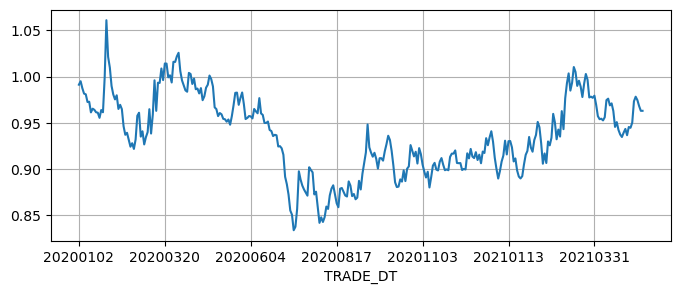

In [5]:
%%time
N=int(np.round(data.shape[1]*0.1))  
data['ret']=0
for i in data.index[0:len(data.index)-1]:
    tar=data.loc[[i,data.index[np.where(data.index==i)[0][0]+1]]]  
    day_i = tar.sort_values(by=i,axis=1,ascending=False)  
    portf=day_i.iloc[0:N+1]  #select top 10% price
    r=np.log(portf.T.sum()[i]/portf.shift(-1).T.sum()[i])
    data.loc[i,'ret']=r
data['ret'].cumsum().apply(np.exp).plot(grid=True,figsize=(8,3))

In [6]:
sig=data['ret'].cumsum().apply(np.exp).std()*math.sqrt(data.shape[0])
rm=0.022  #risk-free interest
rf=data['ret'].cumsum().apply(np.exp)[-2]  #return rate
sharpe=((rf-1)-rm)/sig
print("total return：%f"%((rf-1)))
print("volatility：%f"%sig)
print("sharpe：%f"%sharpe)

total return：-0.036945
volatility：0.769836
sharpe：-0.076568
